In [21]:
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import style
style.use('seaborn-talk')
from matplotlib import cm
import numpy as np
import os
import scipy.io
import seaborn as sb
from scipy.fftpack import fft
import csv
import pandas as pd
from scipy.signal import butter, filtfilt
import glob
import seaborn as sns
from scipy import signal

In [22]:
# Pathways
source = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Centroids_Trimmed"
figpath = r"/Users/Mahad/Downloads/drive-download-20200317T004709Z-001/Figures"

In [23]:
#load single flight path
df = pd.read_csv(source + '/Sham_1_12_35598.csv')

In [24]:
def Tortuosity(x, time):
    
    
    t = time/100
    
    Nx = len(x)  #number of points
    Nt = Nx
    Time = t[-1]-t[0]   #total sample time (in seconds)c
    fs = Nx/Time   # sample frequency
    TT = 1/fs  #delta t.
 
    meanx = np.mean(x)
    
    # . fftxvel is complex with real and imaginary part.
    #Nyquist spacing (first half of Fourier) -- the list of frequencies for which we have Fourier coefficients
    fftx = fft(x-meanx)    # this is the Fourier tranform of the x velocity
    xf = np.linspace(0.0, 1.0/(2.0*TT), Nx//2)  

    
    return xf, Nx, fftx

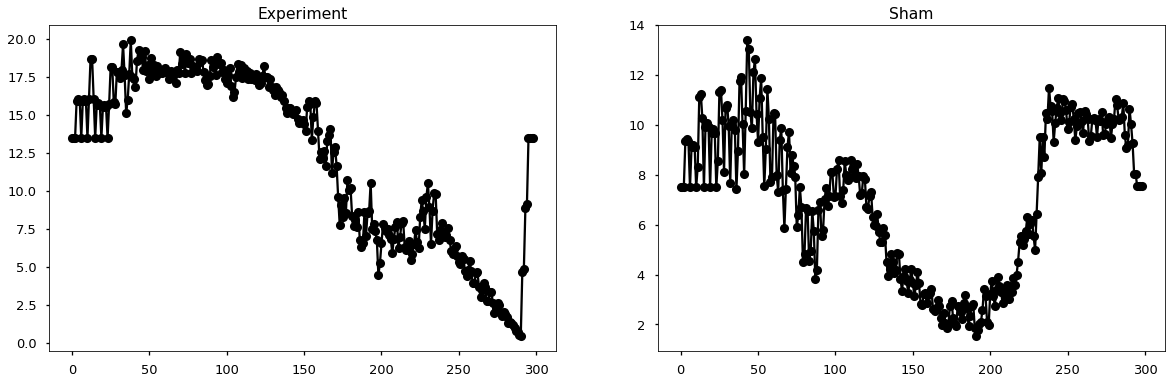

In [25]:
x, y, time = df.X_position.values*2.5/75, df.Y_position.values*2.5/75, df.FrameNumber.values

fig, ax = plt.subplots(1,2, figsize = (20,6), sharex = True)
ax[0].set_title("Experiment")
ax[0].plot(x, "o-", c = "k")
ax[1].set_title("Sham")
ax[1].plot(y, "o-", c = "k")

In [26]:
chunk = 40

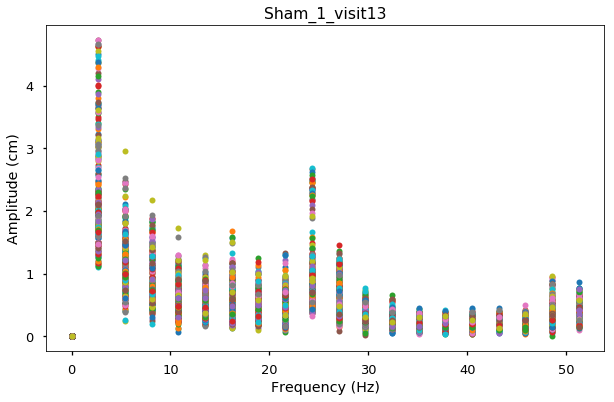

In [27]:
n = np.arange(0,len(x)-chunk,1)
ratio_list = []
plt.figure(figsize=(10,6))

for element in n:

    
    shortest_path = np.sqrt((x[element+chunk]-x[element])**2 + (y[element+chunk]-y[element])**2)


    actual_list = 0
    i = 0
    while i < len(x[element:element+chunk]):



        actual_path = np.sqrt((x[element:element+chunk+1][i+1]-x[element:element+chunk+1][i])**2 + (y[element:element+chunk+1][i+1]-y[element:element+chunk+1][i])**2)
        actual_list += actual_path



        i +=1
    
    
    xf, Nx, fftx = Tortuosity(x[element:element+chunk], time[element:element+chunk])
    yf, Ny, ffty = Tortuosity(y[element:element+chunk], time[element:element+chunk])
    sum_xy = ((2.0/Ny * np.abs(ffty[0:Ny//2])) + (2.0/Nx * np.abs(fftx[0:Nx//2])))
    plt.title("Sham_1_visit13")
    plt.ylabel("Amplitude (cm)")
    plt.xlabel("Frequency (Hz)")
    plt.plot(xf, sum_xy, "o", ms = 6)
    
    
    
    
    #should account for last point, there has to be more efficient way to do this 

    ratio = actual_list/shortest_path
    ratio_list.append(ratio)

    mean = np.mean(ratio_list)
    std = np.std(ratio_list)